### PCA : Proteins

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
sns.set(font_scale=2.8)

### Data

In [25]:
data = pd.read_csv('../../result/caseolap.csv')
data = data.set_index('protein')
ndf = data.iloc[:,0:10]
print(len(ndf))
ndf.head()

728


,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO
protein,,,,,,,,,,
Q96DA6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q96IX5,0.0,0.0,0.0,0.014041,0.0,0.0,0.0,0.0,0.0,0.0
Q92947,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q9P2J9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q9H4I9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
ndf.columns

Index(['LHON', 'MELAS', 'ADOA', 'Leigh', 'MERRF', 'KSS', 'Alpers', 'LBSL',
       'PDD', 'PEO'],
      dtype='object')

#### Proteins for Each Disease

In [27]:
nonzero_dict = {}
for col in ndf.columns:
    nonzero = 0
    for i in range(0,len(ndf)):
        if(ndf[col][i] > 0):
            nonzero += 1
    nonzero_dict[col] = nonzero
print(nonzero_dict)

{'LHON': 71, 'MELAS': 73, 'ADOA': 45, 'Leigh': 163, 'MERRF': 40, 'KSS': 77, 'Alpers': 43, 'LBSL': 20, 'PDD': 42, 'PEO': 49}


In [28]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr =  ["LHON", "MELAS", "ADOA", "Leigh", "MERRF", "KSS", "Alpers", "LBSL", "PDD", "PEO"]
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO
protein,,,,,,,,,,
Q96DA6,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
Q96IX5,0.0,0.0,0.0,0.1443,0.0,0.0,0.0,0.0,0.0,0.0
Q92947,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
Q9P2J9,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
Q9H4I9,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


### Add colors

In [29]:
tdata = ndf.copy(deep =True)

### PCA : Weights

In [30]:
def pca_results(good_data, pca,fname):
	#clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue',"red","blue"]

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (22,10))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar' );
	ax.set_ylabel("Feature Weights",fontsize =20)
	ax.set_xticklabels(dimensions, rotation=0, fontsize = 20)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev),fontsize =10)

	# Return a concatenated DataFrame
	plt.legend(fontsize =15)
	plt.savefig(fname)
	return pd.concat([variance_ratios, components], axis = 1)

In [31]:
wt_data = ndf.copy(deep =True)

In [32]:
print(len(wt_data))
wt_data.head()

728


,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO
protein,,,,,,,,,,
Q96DA6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q96IX5,0.0,0.0,0.0,0.014041,0.0,0.0,0.0,0.0,0.0,0.0
Q92947,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q9P2J9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Q9H4I9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


,Explained Variance,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO
Dimension 1,0.2693,0.0774,0.2473,0.1398,0.3309,0.2289,0.4207,0.3666,0.0485,0.0489,0.6598
Dimension 2,0.1894,-0.0048,0.0027,-0.0259,0.1635,0.0136,-0.0085,-0.1371,-0.0279,0.9736,-0.0703
Dimension 3,0.1623,0.1083,0.0596,0.7104,0.1727,0.0765,0.0700,-0.6352,-0.1572,-0.1021,0.0287
Dimension 4,0.1471,0.0402,-0.1312,0.6781,-0.2491,-0.1530,-0.2005,0.5779,0.1564,0.1368,-0.1362
Dimension 5,0.0958,-0.0648,-0.0751,-0.0122,-0.7550,-0.1303,0.0204,-0.2179,-0.1153,0.1354,0.5688
Dimension 6,0.0419,0.0248,0.1774,0.0131,-0.2864,0.4557,0.1899,-0.1680,0.7636,0.0292,-0.1726
Dimension 7,0.0372,0.0307,-0.2494,-0.0297,0.3102,-0.5679,-0.1845,-0.1826,0.5909,-0.0317,0.3156
Dimension 8,0.0353,0.9665,0.1294,-0.1123,-0.1075,-0.1387,0.0258,0.0114,-0.0348,0.0181,-0.0576
Dimension 9,0.0127,-0.2001,0.7894,0.0314,-0.0866,-0.5236,0.1676,-0.0074,0.0229,0.0091,-0.1591
Dimension 10,0.0091,0.0258,0.4228,-0.0207,0.0674,0.2786,-0.8238,-0.0104,0.0180,-0.0074,0.2427


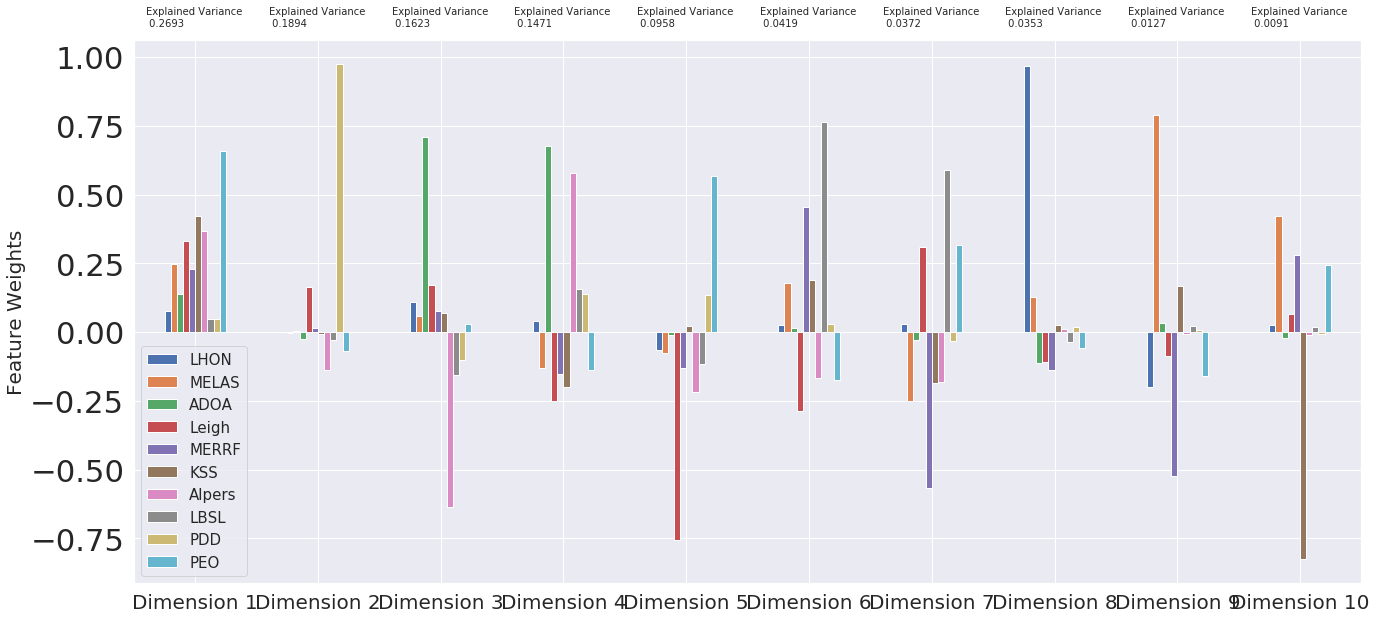

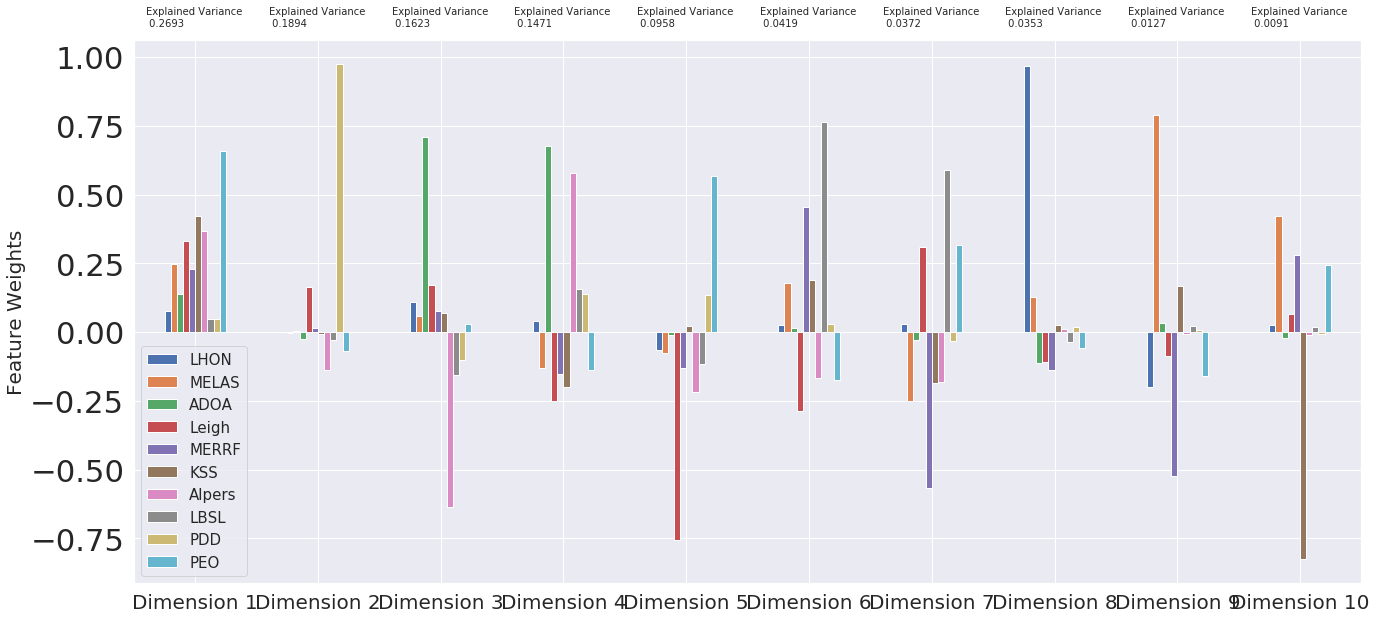

In [33]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(wt_data)


# Generate PCA results plot
pca_results(wt_data, pca, fname = 'Data/pca-mito-primary-weights.pdf')
pca_results(wt_data, pca, fname = 'Data/pca-mito-primary-weights.png')

In [34]:
pca_results

<function __main__.pca_results>

In [35]:
pca.components_

array([[ 0.0773692 ,  0.24729971,  0.13979945,  0.33094468,  0.22889493,
         0.42067351,  0.36661663,  0.04848221,  0.04894926,  0.6597539 ],
       [-0.00484676,  0.0026502 , -0.02588053,  0.16350795,  0.01358533,
        -0.00845217, -0.13705403, -0.02789766,  0.97355221, -0.07030538],
       [ 0.10828365,  0.05958787,  0.71042799,  0.17268905,  0.07648994,
         0.07001633, -0.63521395, -0.15717737, -0.10205327,  0.02872543],
       [ 0.04018235, -0.13122811,  0.67812859, -0.24905148, -0.15298664,
        -0.20046286,  0.57790315,  0.15639249,  0.1368108 , -0.13616685],
       [-0.06484163, -0.07514978, -0.01216365, -0.7549932 , -0.13026963,
         0.02042847, -0.21790865, -0.11528592,  0.13544691,  0.56875038],
       [ 0.02483269,  0.17738271,  0.0131008 , -0.28641074,  0.45567273,
         0.18989068, -0.16798354,  0.76364708,  0.02915087, -0.17261158],
       [ 0.03071327, -0.24937489, -0.02969558,  0.31021186, -0.56794247,
        -0.18446754, -0.18260932,  0.59093114

----------

### PCA: Biplot

In [36]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'orange'
        elif mx == col[2]:
            grp = 'green'
        elif mx == col[3]:
            grp = 'red'
        elif mx == col[4]:
            grp = 'purple'
        elif mx == col[5]:
            grp = 'brown'
        elif mx == col[6]:
            grp = "pink"
        elif mx == col[7]:
            grp = "grey"
        elif mx == col[8]:
            grp =  'orange'
        elif mx == col[9]:
            grp = 'green'

    clrs.append(grp)

In [37]:
pdata = ndf.copy(deep = True)
ppdata = ndf.copy(deep = True)

In [38]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(pdata)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(ppdata)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data

,Dimension 1,Dimension 2
0,-0.003961,-0.001435
1,0.000686,0.000861
2,-0.003961,-0.001435
3,-0.003961,-0.001435
4,-0.003961,-0.001435
...,...,...
723,0.001120,0.000605
724,-0.003961,-0.001435
725,-0.002515,-0.000720
726,0.004413,-0.002810


In [39]:
def biplot(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey",'navy','orange']
    
    # scatterplot of the reduced data    

    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    # Label the points
    # REMOVE COMMENTS BELOW TO ADD PROTEIN ID LABELS TO PCA
    #for i in range(0,len(reduced_data)):
    #    ax.annotate(wt_data.index.values[i], (reduced_data.loc[:, 'Dimension 1'][i],reduced_data.loc[:, 'Dimension 2'][i]), xytext=(10,10), fontsize = 14, textcoords='offset points')
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    
    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                  head_width=0.005, head_length=0.005, linewidth=2, color= clc[i])
        
        ax.text(v[0]*tpos+ 0.018, v[1]*tpos-0.028, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=20)

        
    plt.axis([-0.1, 0.4, -0.3, 0.6])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

In [40]:
def biplot_labeled_points(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey",'navy','orange','green','orange','purple', 'brown',"pink","grey",'pink','grey','navy']
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    # Label the points: COMMENT OUT IF YOU WANT TO REMOVE THE ID LABELS
    for i in range(0,len(reduced_data)):
        ax.annotate(wt_data.index.values[i], (reduced_data.loc[:, 'Dimension 1'][i],reduced_data.loc[:, 'Dimension 2'][i]), xytext=(5,5), fontsize = 14, textcoords='offset points')

    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize,head_width=0.001, head_length=0.0005, linewidth=1, color= clc[i])
        ax.text(v[0]*tpos+ 0.01, v[1]*tpos, good_data.columns[i], color=clc[i], 
                 ha='center', va='center', fontsize=25)
        
    plt.axis([-0.1, 0.3, -0.3, 0.5])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

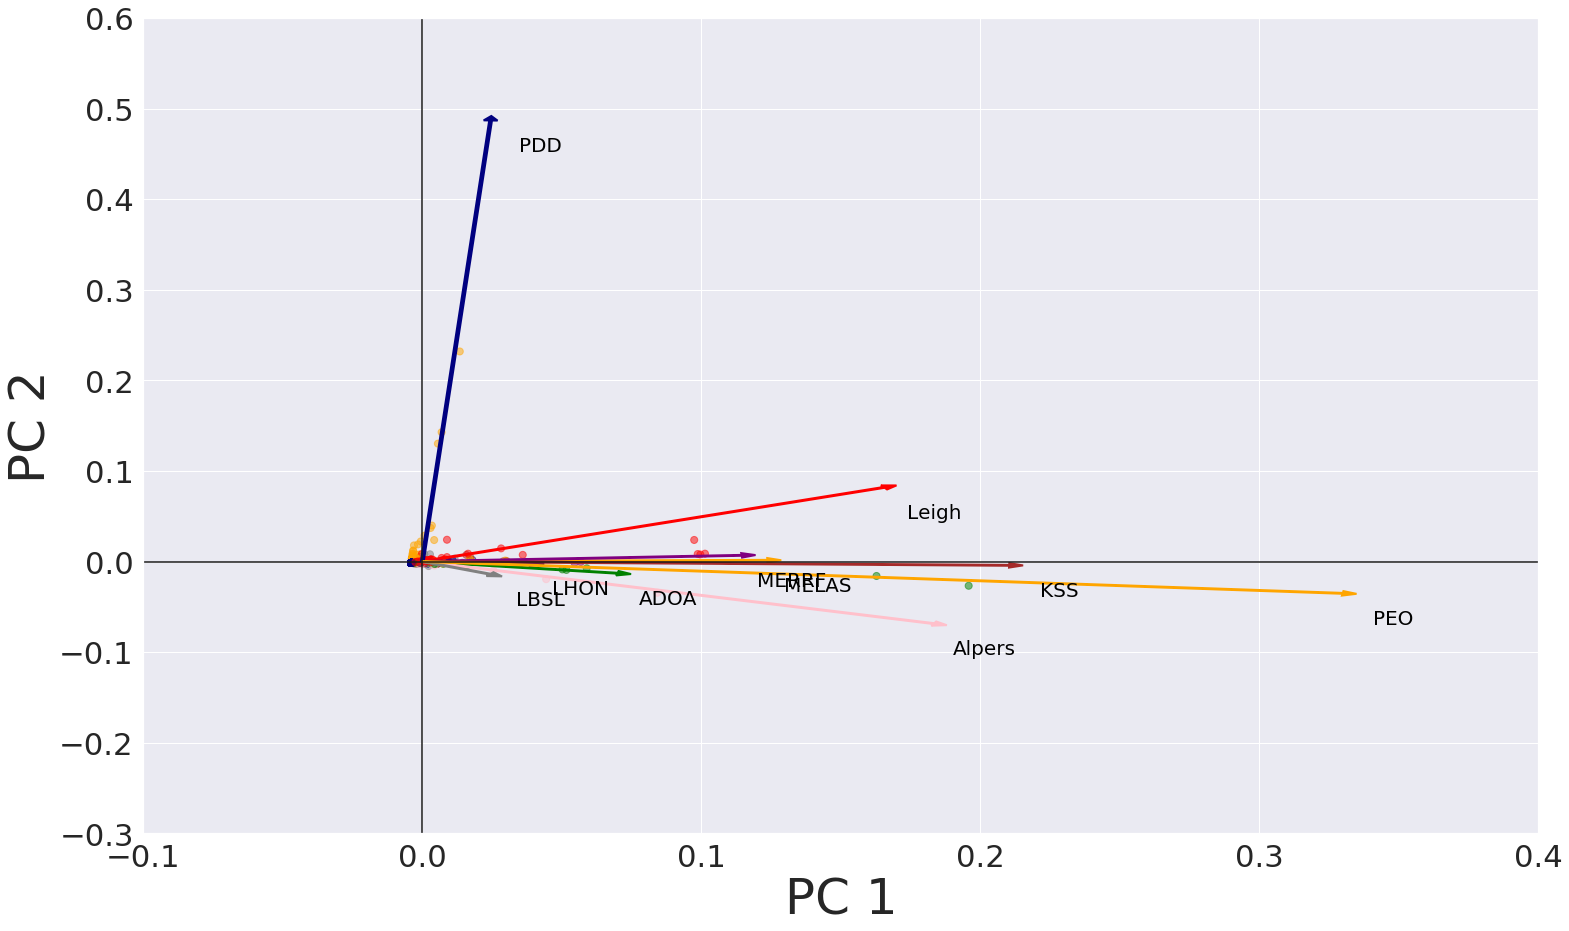

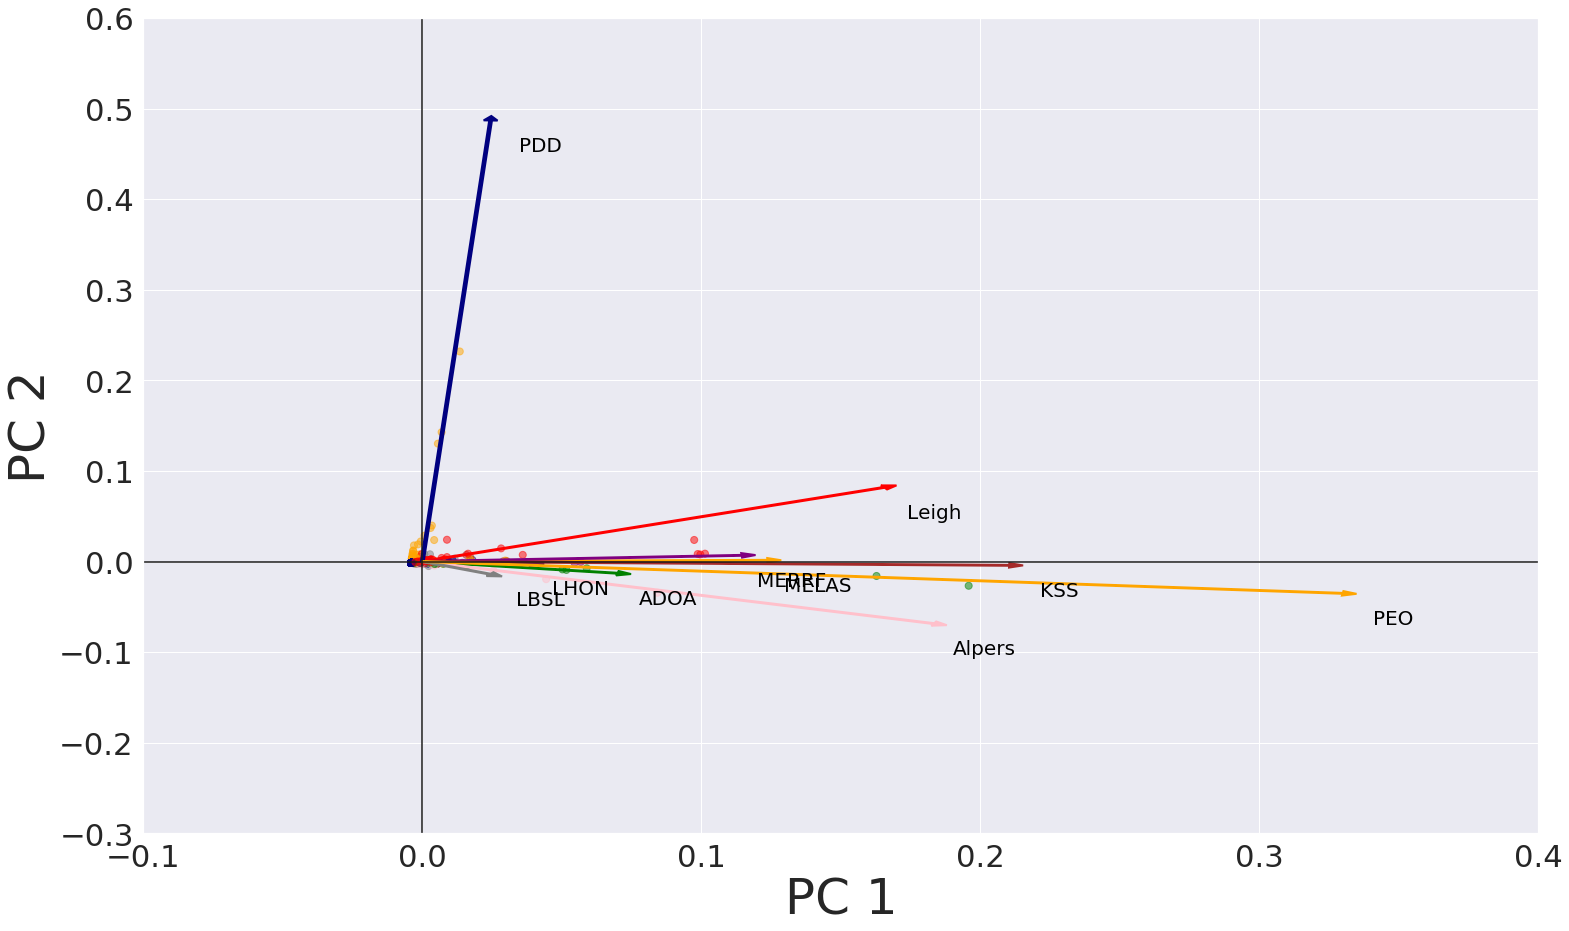

In [41]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot(newdata, reduced_data, pca,'Data/protein-primary-biplot.pdf',clrs);
biplot(newdata, reduced_data, pca,'Data/protein-primary-biplot.png',clrs);

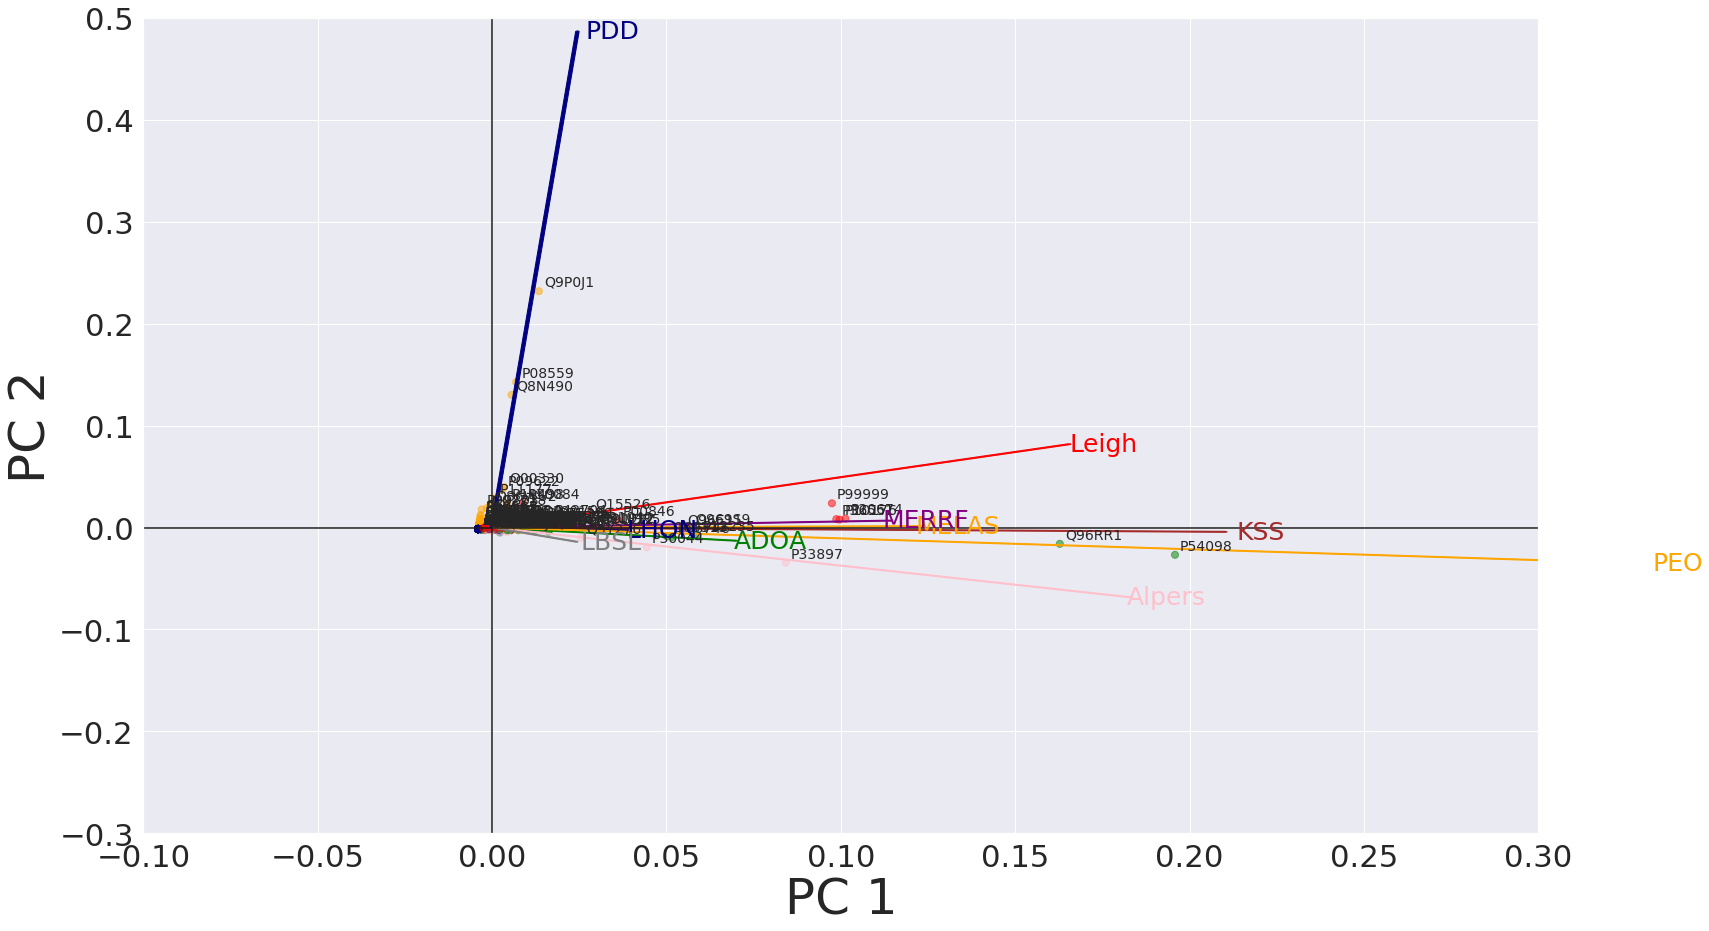

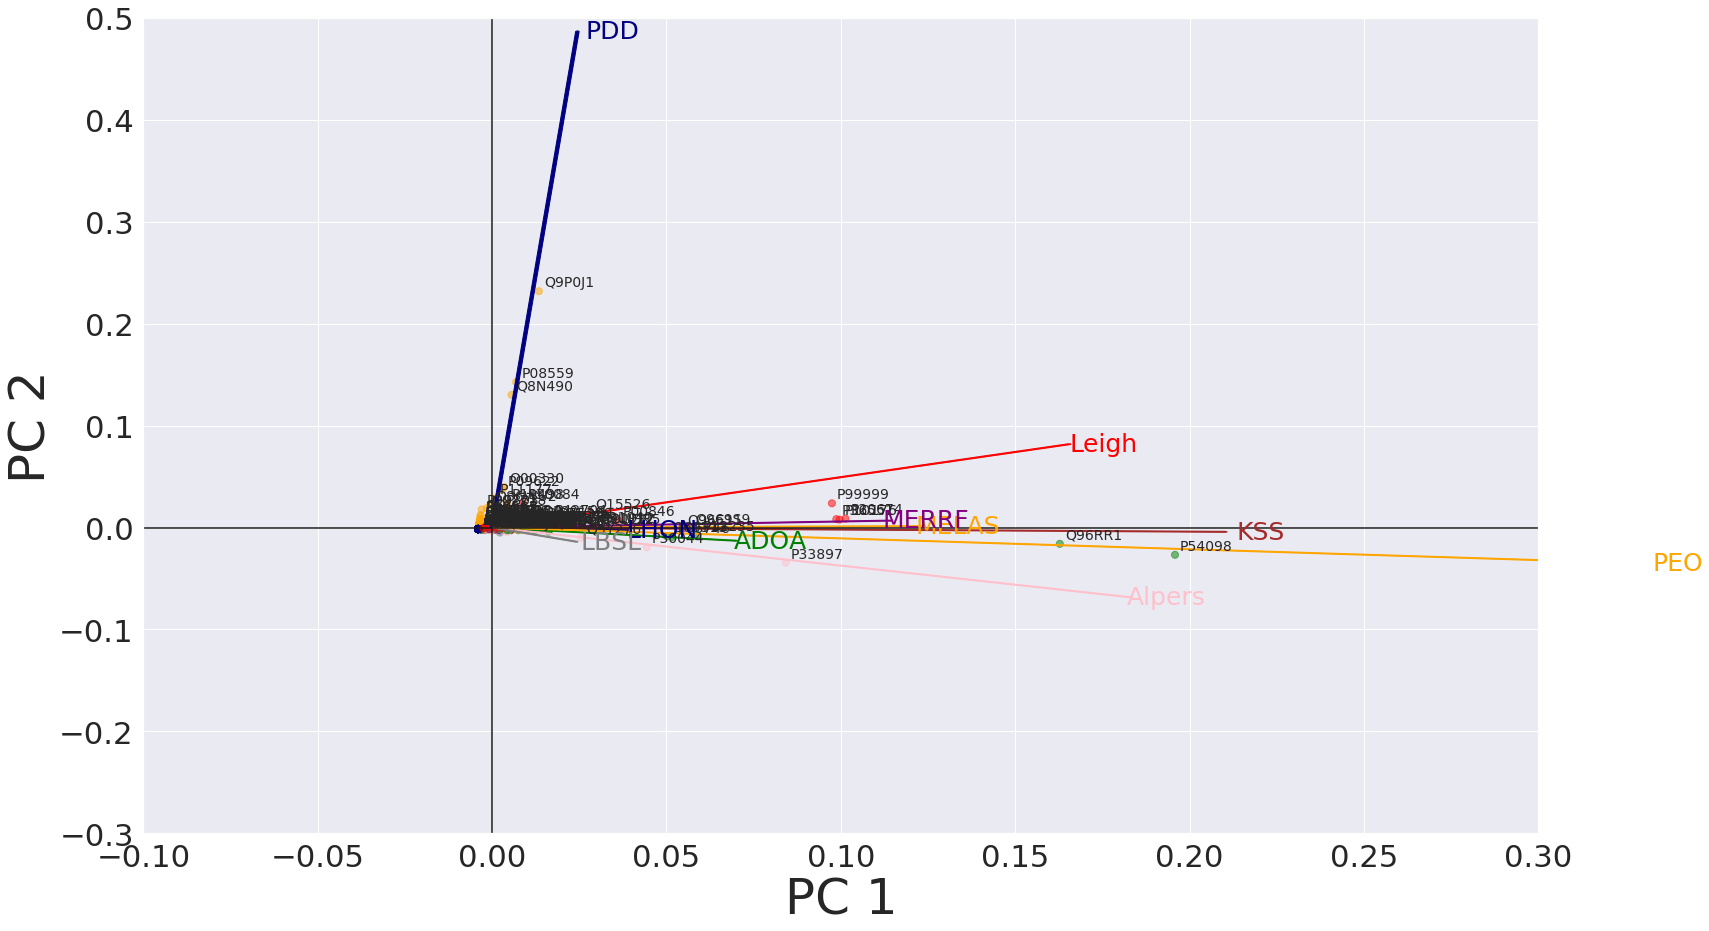

In [42]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot_labeled_points(newdata, reduced_data, pca,'Data/protein-primary-labeled-biplot.pdf',clrs);
biplot_labeled_points(newdata, reduced_data, pca,'Data/protein-primary-labeled-biplot.png',clrs);